In [32]:
from functools import cache

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import typing

from sklearn.model_selection import train_test_split

rng = np.random.default_rng()
np.set_printoptions(linewidth=180)

In [2]:
mnist_test = pd.read_csv(r'archive\mnist_test.csv')
mnist_train = pd.read_csv(r'archive\mnist_train.csv')

In [5]:
mnist_train.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [34]:
labels = [0,1]

labels_test = mnist_test[mnist_test.label.isin(labels)]
labels_train = mnist_train[mnist_train.label.isin(labels)]
image_data_train_df = labels_train.drop("label", axis=1)
image_data_test_df = labels_test.drop("label", axis=1)
image_data_train_zero = image_data_train_df[labels_train.label == labels[0]]
image_data_train_one = image_data_train_df[labels_train.label == labels[1]]

In [36]:
def make_np_image_data(df: pd.DataFrame) -> np.ndarray:
    image_data = df if isinstance(df, np.ndarray) else df.to_numpy()
    return image_data.reshape((-1, 28, 28))

In [17]:
def show_images(image_data: np.ndarray, rows=3, columns=3):
    fig, axes = plt.subplots(rows, columns)
    for ax, image_datum in zip([ax for _axes in axes for ax in _axes], rng.choice(image_data, rows*columns)):
        ax.imshow(image_datum)
    return fig, axes

(<Figure size 640x480 with 9 Axes>,
 array([[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object))

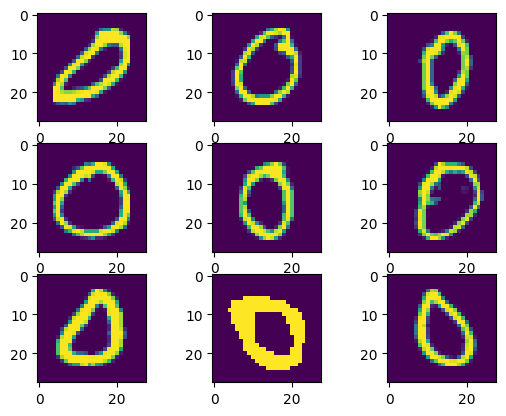

In [53]:
# show_images(make_np_image_data(image_data_train_df))
# show_images(make_np_image_data(image_data_train_one))
show_images(make_np_image_data(image_data_train_zero))

# Feature Experimentation
* ex_

In [59]:
def simple_cache(fn):
    from functools import wraps
    result = None
    has_result = False
    @wraps(fn)
    def wrapped(*args, **kwargs):
        nonlocal result, has_result
        if not has_result:
            result = fn(*args, **kwargs)
            has_result = True
        return result
    return wrapped

def ex_get_feature(data: np.ndarray) -> np.ndarray:
    """(-1,28,28) -> (-1,1)"""
    image_size = 28
    width = 8
    o = np.ones((image_size, (image_size - width)//2))
    z = np.zeros((image_size, width))
    kernel = np.ones((image_size,image_size))*np.hstack((o,z,o))
    filtered = data*kernel.reshape((-1,image_size,image_size))
    return filtered.mean(axis=(-2,-1))

@simple_cache
def zero_one_feature():
    return ex_get_feature(make_np_image_data(image_data_train_zero)), ex_get_feature(make_np_image_data(image_data_train_one))

ex_get_feature(make_np_image_data(image_data_train_one))

array([6.00127551, 0.17857143, 0.        , ..., 4.00255102, 9.23469388, 3.86607143])

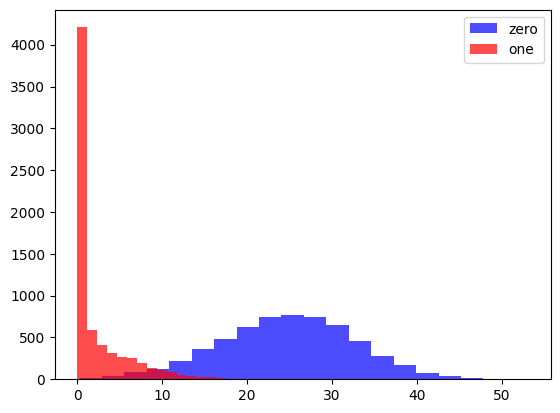

In [60]:
def ex_histogram():
    zero_feature, one_feature = zero_one_feature()
    alpha = .7
    bins = 20
    plt.hist(zero_feature, bins=bins, alpha=alpha, color='blue', label='zero')
    plt.hist(one_feature, bins=bins, alpha=alpha, color='red', label='one')
    plt.legend()

ex_histogram()

### feature_middle_out
Mean of values from outer columns

In [ ]:
class _MiddleOut:
    image_size = 28
    width = 8
    o = np.ones((image_size, (image_size - width)//2))
    z = np.zeros((image_size, width))
    kernel = np.ones((image_size,image_size))*np.hstack((o,z,o))

def get_feature_middle_out(data: np.ndarray) -> np.ndarray:
    """(-1,28,28) -> (-1,1)"""
    image_size = _MiddleOut.image_size
    filtered = data*_MiddleOut.kernel.reshape((-1,image_size,image_size))
    return filtered.mean(axis=(-2,-1))

feature_middle_out_zero = get_feature_middle_out(make_np_image_data(image_data_train_zero))
feature_middle_out_one = get_feature_middle_out(make_np_image_data(image_data_train_one))